# Model prediction of hazardous materials

<img src = "https://5.imimg.com/data5/GB/CR/IX/SELLER-41614352/handling-hazardous-material.jpg">




## 🖼️ Background

Once upon a time, in the early days of industrialization, there was little to no regulation on the use and handling of materials in the supply chain. As a result, hazardous materials were often used without proper safety precautions, putting workers and consumers at risk.
In the mid-20th century, public awareness of the dangers of hazardous materials began to grow, leading to the creation of regulations and safety standards. However, enforcing these standards was difficult, as there was no reliable way to quickly and accurately detect whether a material was hazardous or not.

This led to the development of various testing methods and technologies, such as chemical analysis and toxicity testing. However, these methods were often time-consuming and expensive, making them impractical for widespread use in the supply chain.

As technology advanced, new possibilities emerged. In the 21st century, machine learning and artificial intelligence algorithms became increasingly powerful and sophisticated. This opened up the possibility of using these algorithms to develop a faster, more efficient method of detecting hazardous materials in the supply chain.

The user, recognizing the potential of this technology, began working on developing an algorithm that could detect hazardous materials in real-time. They worked with experts in the field of chemistry and toxicology to gather data and train their algorithm to accurately identify hazardous materials.

After months of hard work, the user's algorithm was finally ready for testing. They integrated it into a supply chain monitoring system, which could automatically analyze incoming materials and alert workers if any hazardous materials were detected.

Thanks to the user's innovation and hard work, the supply chain became much safer, as workers and consumers could trust that the materials they were handling and using were not hazardous. This led to a significant reduction in workplace injuries and illnesses, and helped protect the health and safety of communities around the world.


## 📁 Dataset
For this challenge, you will have 2 CSV and a XSLX file:

state_code_to_name.csv
supply_chain_2012.csv (Train and Test)
cfs-2012-pum-file-users-guide-app-a-jun2015.xlsx
You will have to create a prediction model based on the HAZMAT variable found in the supply_chain_2012.csv

The dataset can be found in the XSLX file explained.

There is the following file to be downloaded:

data.zip: It is a table that relates the data with the fiiles described above. Download data.zip

## 📌 Task
The tasks are going to be based on answering and coding the following questions:

Create a prediction Model that can detect when a material in the Supply Chain is Hazardous and its type.


------------


## Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.options.display.float_format = '{:.0f}'.format
import geopandas as gpd
import matplotlib.gridspec as gridspec

## Modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

## Data Cleaning

In [2]:
df_raw = pd.read_csv('00 - Data/supply_chain_train.csv')
state_code_to_name = pd.read_csv('00 - Data/state_code_to_name.csv')
shapes = gpd.read_file('00 - Data/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')

In [3]:
shapes.head(2)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."


### State Code to Name

In [4]:
display("Top 5 records\n",state_code_to_name.head(5),"Latest 5 records\n", state_code_to_name.tail(5))

'Top 5 records\n'

,StateCode,StateName
0,1,Alabama
1,2,Alaska
2,4,Arizona
3,5,Arkansas
4,6,California


'Latest 5 records\n'

,StateCode,StateName
46,51,Virginia
47,53,Washington
48,54,West Virginia
49,55,Wisconsin
50,56,Wyoming


## Train Dataset

In [5]:
# Top 5 rows of train dataset
display(df_raw.head(5), df_raw.columns)

,train_idx,SHIPMT_ID,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,...,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,WGT_FACTOR,HAZMAT
0,0,703837,19,99999,19-99999,19,99999,19-99999,325,2,...,5,1868,67931,119,162,N,N,N,157,1
1,1,2855307,37,268,37-268,37,268,37-268,212,1,...,5,302,32638,17,21,N,N,N,54,1
2,2,3712963,48,13140,48-13140,48,288,48-288,325,1,...,6,90610,164745,92,132,N,N,N,465,0
3,3,1221124,41,99999,41-99999,41,99999,41-99999,4247,4,...,5,4503,3750,9,9,N,N,N,1568,1
4,4,1956408,47,314,47-314,21,99999,21-99999,4234,1,...,5,108,11,63,85,N,N,N,391,1


Index(['train_idx', 'SHIPMT_ID', 'ORIG_STATE', 'ORIG_MA', 'ORIG_CFS_AREA',
       'DEST_STATE', 'DEST_MA', 'DEST_CFS_AREA', 'NAICS', 'QUARTER', 'SCTG',
       'MODE', 'SHIPMT_VALUE', 'SHIPMT_WGHT', 'SHIPMT_DIST_GC',
       'SHIPMT_DIST_ROUTED', 'TEMP_CNTL_YN', 'EXPORT_YN', 'EXPORT_CNTRY',
       'WGT_FACTOR', 'HAZMAT'],
      dtype='object')

In [6]:
# checking shape and nulls values
display("Shape: ",df_raw.shape,
        "Distribution: ",df_raw.describe().transpose(),
       "Null Values: ", df_raw.isnull().sum())

'Shape: '

(3638128, 21)

'Distribution: '

,count,mean,std,min,25%,50%,75%,max
train_idx,3638128,1819064,1050237,0,909532,1819064,2728595,3638127
SHIPMT_ID,3638128,2273763,1312943,2,1136599,2273330,3410918,4547661
ORIG_STATE,3638128,29,15,0,17,29,42,56
ORIG_MA,3638128,38430,46903,0,312,476,99999,99999
DEST_STATE,3638128,29,16,1,17,29,42,56
DEST_MA,3638128,40363,47187,104,332,488,99999,99999
NAICS,3638128,7137,46718,212,326,339,4241,551114
QUARTER,3638128,2,1,1,1,2,3,4
MODE,3638128,7,4,0,4,5,14,101
SHIPMT_VALUE,3638128,18419,1131607,1,176,874,6015,521277800


'Null Values: '

train_idx             0
SHIPMT_ID             0
ORIG_STATE            0
ORIG_MA               0
ORIG_CFS_AREA         0
DEST_STATE            0
DEST_MA               0
DEST_CFS_AREA         0
NAICS                 0
QUARTER               0
SCTG                  0
MODE                  0
SHIPMT_VALUE          0
SHIPMT_WGHT           0
SHIPMT_DIST_GC        0
SHIPMT_DIST_ROUTED    0
TEMP_CNTL_YN          0
EXPORT_YN             0
EXPORT_CNTRY          0
WGT_FACTOR            0
HAZMAT                0
dtype: int64

>💡In general lines, the dataset seems to be a good baseline to start making some preliminar analysis, since in terms of data we will not have to deal with null values, or strange distributions.
The only thing we will do in this stage, is to use the states dataset in order to replace the states code in our base dataset.


In [7]:
df_raw['ORIG_STATE_NAME'] = df_raw['ORIG_STATE'].map(state_code_to_name.set_index('StateCode')['StateName'])
df_raw['DEST_STATE_NAME'] = df_raw['DEST_STATE'].map(state_code_to_name.set_index('StateCode')['StateName'])

---------

## Preliminar Analysis

We will define a function to plot summarized values into a geopandas map.
The function will take the following parameters:
- df_values: is the dataset in where we have the origin and destination data for materials
- shapes: geopandas dataframe
- focus: if we want to focus by destiny of materials (default option) or origin of materials
- cross_filter_state = to filter by source of materials (in case of Destiny option selected) or destiny of materials (in case of ORIGIN option selected)

In [8]:
def create_table(data,focus, cross_filter_state):
    # output list
    states = []
 
    pivot_data = data.pivot_table(index=['ORIG_STATE','ORIG_STATE_NAME','DEST_STATE','DEST_STATE_NAME'],values  = 'train_idx',aggfunc='count').reset_index()
    
    if focus == 'DES':
        state_list = list(pivot_data.DEST_STATE_NAME.unique() if cross_filter_state=='ALL' else cross_filter_state)
        pivot_data = pivot_data.loc[pivot_data.ORIG_STATE_NAME.isin(state_list)].pivot_table(index = ['DEST_STATE','DEST_STATE_NAME'], values='train_idx',aggfunc='sum').reset_index()
        pivot_data.rename(columns = {'DEST_STATE':'code','DEST_STATE_NAME':'state','train_idx':'total'}, inplace = True) 
    else:
        state_list = list(pivot_data.ORIG_STATE_NAME.unique() if cross_filter_state =='ALL' else cross_filter_state)
        pivot_data = pivot_data.loc[pivot_data.DEST_STATE_NAME.isin(state_list)].pivot_table(index = ['ORIG_STATE','ORIG_STATE_NAME'], values='train_idx',aggfunc='sum').reset_index()
        pivot_data.rename(columns = {'ORIG_STATE':'code','ORIG_STATE_NAME':'state','train_idx':'total'}, inplace = True) 

    return pivot_data


def plotting_map(df_values, shapes, title, cross_filter_state='ALL'):
    # converting the original dataset into a pivot table
    destiny_data = create_table(df_values, 'DES', cross_filter_state)
    origin_data = create_table(df_values,'ORI', cross_filter_state)
    
    # merging
    shapes['GEOID'] = shapes['GEOID'].astype(str).astype(int)
    
    merged_des = shapes.merge(destiny_data, left_on='GEOID', right_on='code', how='left')
    merged_or = shapes.merge(origin_data, left_on='GEOID', right_on='code', how='left')
    
    # set a variable that will call whatever column we want to visualize on the map
    variable = 'total'
    # set the range for the choropleth
    vmin, vmax = -160, -65

    # Create subplots with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))

    # Plot the first map
    ax1 = axes[0]
    ax1.set_xlim(vmin, vmax)
    ax1.set_title(title + ' - Origin', size=20)
    merged_or.plot(column=variable, cmap='OrRd', linewidth=0.8, ax=ax1, edgecolor='0.8', legend=True)

    # Add annotations for 'total' values in Map 1
    for idx, row in merged_or.iterrows():
        annotation_text = row['STUSPS']
        ax1.annotate(text=annotation_text,
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     xytext=(3, 3),  # offset for the text
                     textcoords="offset points",
                     ha='center', va='center',
                     fontsize=8, color='black')

    # Plot the second map
    ax2 = axes[1]
    # Customize ax2 settings as needed
    ax2.set_xlim(vmin, vmax)
    ax2.set_title(title + ' - Destiny', size=20)
    merged_des.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax2, edgecolor='0.8', legend=True)

    # Add annotations for 'total' values in Map 2
    for idx, row in merged_des.iterrows():
        annotation_text = row['STUSPS']
        ax2.annotate(text=annotation_text,
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     xytext=(3, 3),  # offset for the text
                     textcoords="offset points",
                     ha='center', va='center',
                     fontsize=8, color='black')

    plt.tight_layout()
    plt.show()
    
    # Display top tables separately
    print('TOP 5 Origins: ')
    display(merged_des.sort_values(by='total', ascending=False).head(5))

    print('TOP 5 DEST: ')
    display(merged_or.sort_values(by='total', ascending=False).head(5))

## Printing general operation

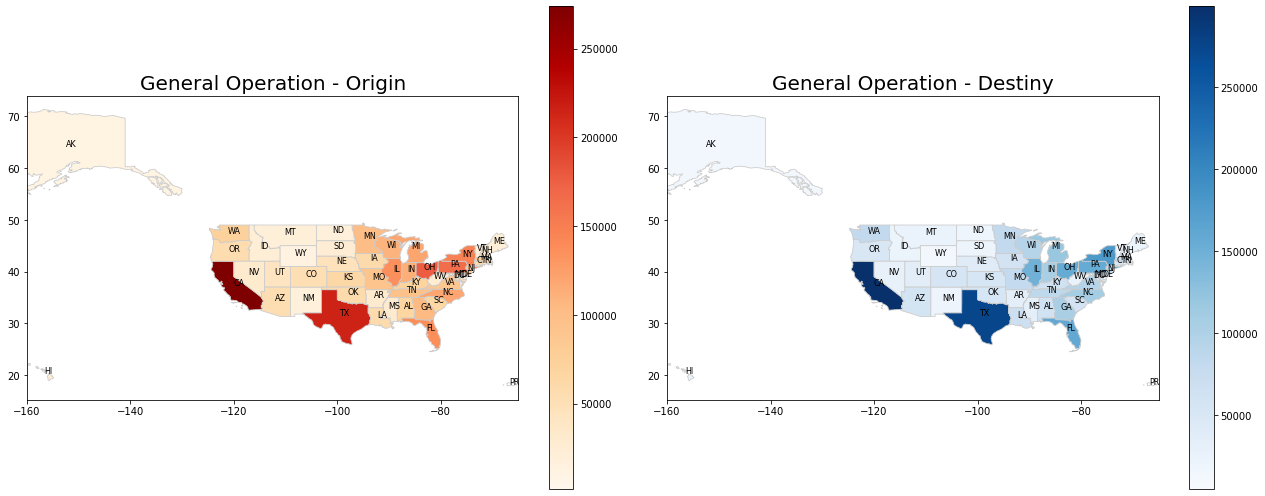

TOP 5 Origins: 


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,code,state,total
12,06,01779778,0400000US06,6,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847...",6,California,299367
11,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.62345 31.91403, -106.63011 31.9...",48,Texas,274111
21,36,01779796,0400000US36,36,NY,New York,00,122049149763,19246994695,"MULTIPOLYGON (((-72.01893 41.27411, -71.92680 ...",36,New York,178825
24,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-81.81169 24.56874, -81.75127 ...",12,Florida,159655
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",39,Ohio,156498


TOP 5 DEST: 


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,code,state,total
12,06,01779778,0400000US06,6,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847...",6,California,273828
11,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.62345 31.91403, -106.63011 31.9...",48,Texas,214380
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",39,Ohio,176907
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987...",42,Pennsylvania,164850
21,36,01779796,0400000US36,36,NY,New York,00,122049149763,19246994695,"MULTIPOLYGON (((-72.01893 41.27411, -71.92680 ...",36,New York,147278


In [9]:
plotting_map(df_raw, shapes,'General Operation')

## We are going to deepdive into the different categories of Hazardous Materials

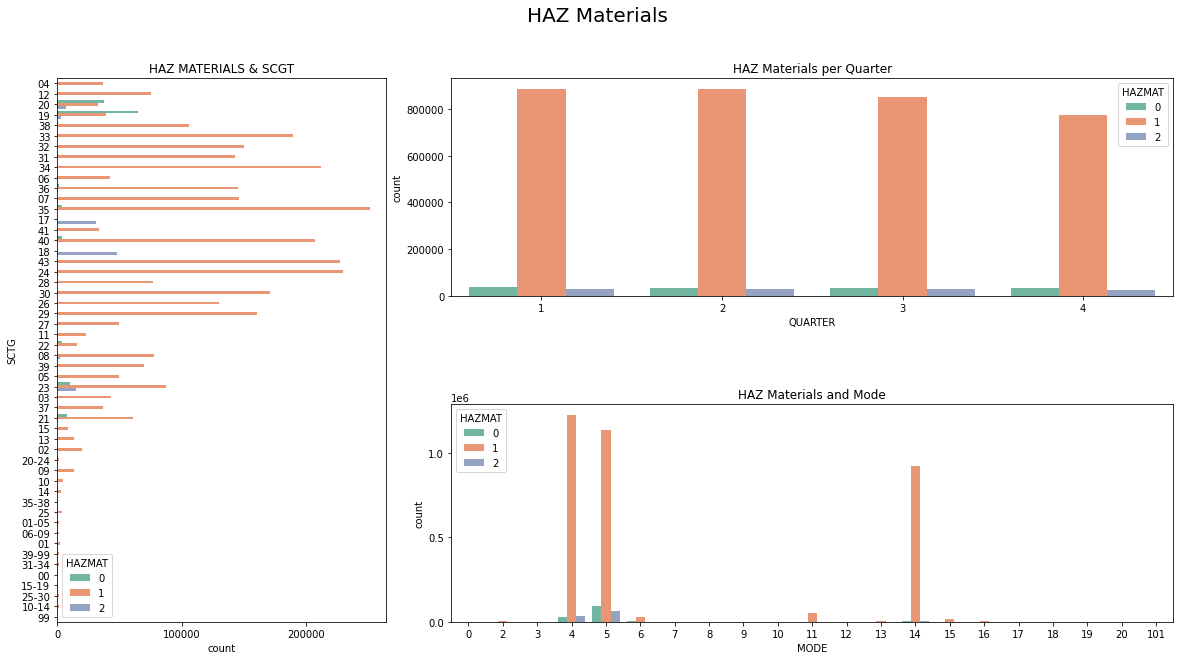

In [10]:
fig = plt.figure(1)
plt.suptitle('HAZ Materials',fontsize=20)
# set up subplot grid
gridspec.GridSpec(2,3)

# large subplot
plt.subplot2grid((2,3), (0,0), colspan=1, rowspan=2)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('HAZ MATERIALS & SCGT')
sns.countplot(data = df_raw, y = 'SCTG', palette='Set2',hue = 'HAZMAT')

# small subplot 1
plt.subplot2grid((2,3), (0,1),colspan=2)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('HAZ Materials per Quarter')
sns.countplot(data = df_raw, x = 'QUARTER', palette='Set2',hue = 'HAZMAT')

# small subplot 2
plt.subplot2grid((2,3), (1,1),colspan=2)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('HAZ Materials and Mode')
sns.countplot(data = df_raw, x = 'MODE',palette='Set2',hue = 'HAZMAT')


# fit subplots and save fig

fig.set_size_inches(w=20,h=10)
plt.subplots_adjust(hspace=.5)
plt.show()

In [12]:
df_no_haz = df_raw.copy(deep=True).loc[df_raw.HAZMAT==0]
df_no_haz = df_no_haz.loc[df_no_haz.HAZMAT == 0]

df_haz_1 = df_raw.copy(deep=True)
df_haz_1 = df_haz_1.loc[df_haz_1.HAZMAT == 1]

df_haz_2 = df_raw.copy(deep=True)
df_haz_2 = df_haz_2.loc[df_haz_2.HAZMAT == 2]

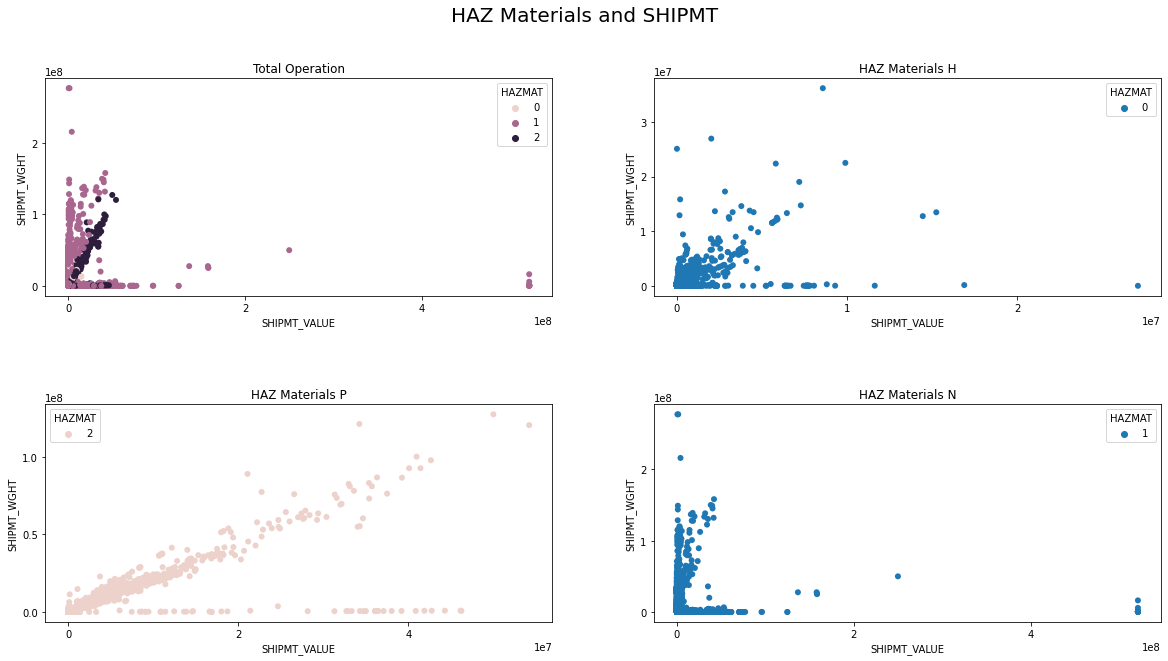

In [14]:
fig = plt.figure(1)
plt.suptitle('HAZ Materials and SHIPMT',fontsize=20)
# set up subplot grid
gridspec.GridSpec(2,2)

# large subplot
plt.subplot2grid((2,2), (0,0))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Total Operation')
sns.scatterplot(x="SHIPMT_VALUE", y="SHIPMT_WGHT",
                hue="HAZMAT",
                sizes=(1, 8), linewidth=0,
                data=df_raw)

# small subplot 1
plt.subplot2grid((2,2), (0,1))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('HAZ Materials H')
sns.scatterplot(x="SHIPMT_VALUE", y="SHIPMT_WGHT",
                hue="HAZMAT",
                sizes=(1, 8), linewidth=0,
                data=df_no_haz)

# small subplot 2
plt.subplot2grid((2,2), (1,1))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('HAZ Materials N')
sns.scatterplot(x="SHIPMT_VALUE", y="SHIPMT_WGHT",
                hue="HAZMAT",
                sizes=(1, 8), linewidth=0,
                data=df_haz_1)


plt.subplot2grid((2,2), (1,0))
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('HAZ Materials P')
sns.scatterplot(x="SHIPMT_VALUE", y="SHIPMT_WGHT",
                hue="HAZMAT",
                sizes=(1, 8), linewidth=0,
                data=df_haz_2)

# fit subplots and save fig

fig.set_size_inches(w=20,h=10)
plt.subplots_adjust(hspace=.5)
plt.show()

Text(0.5, 1.0, 'HAZMAT per State')

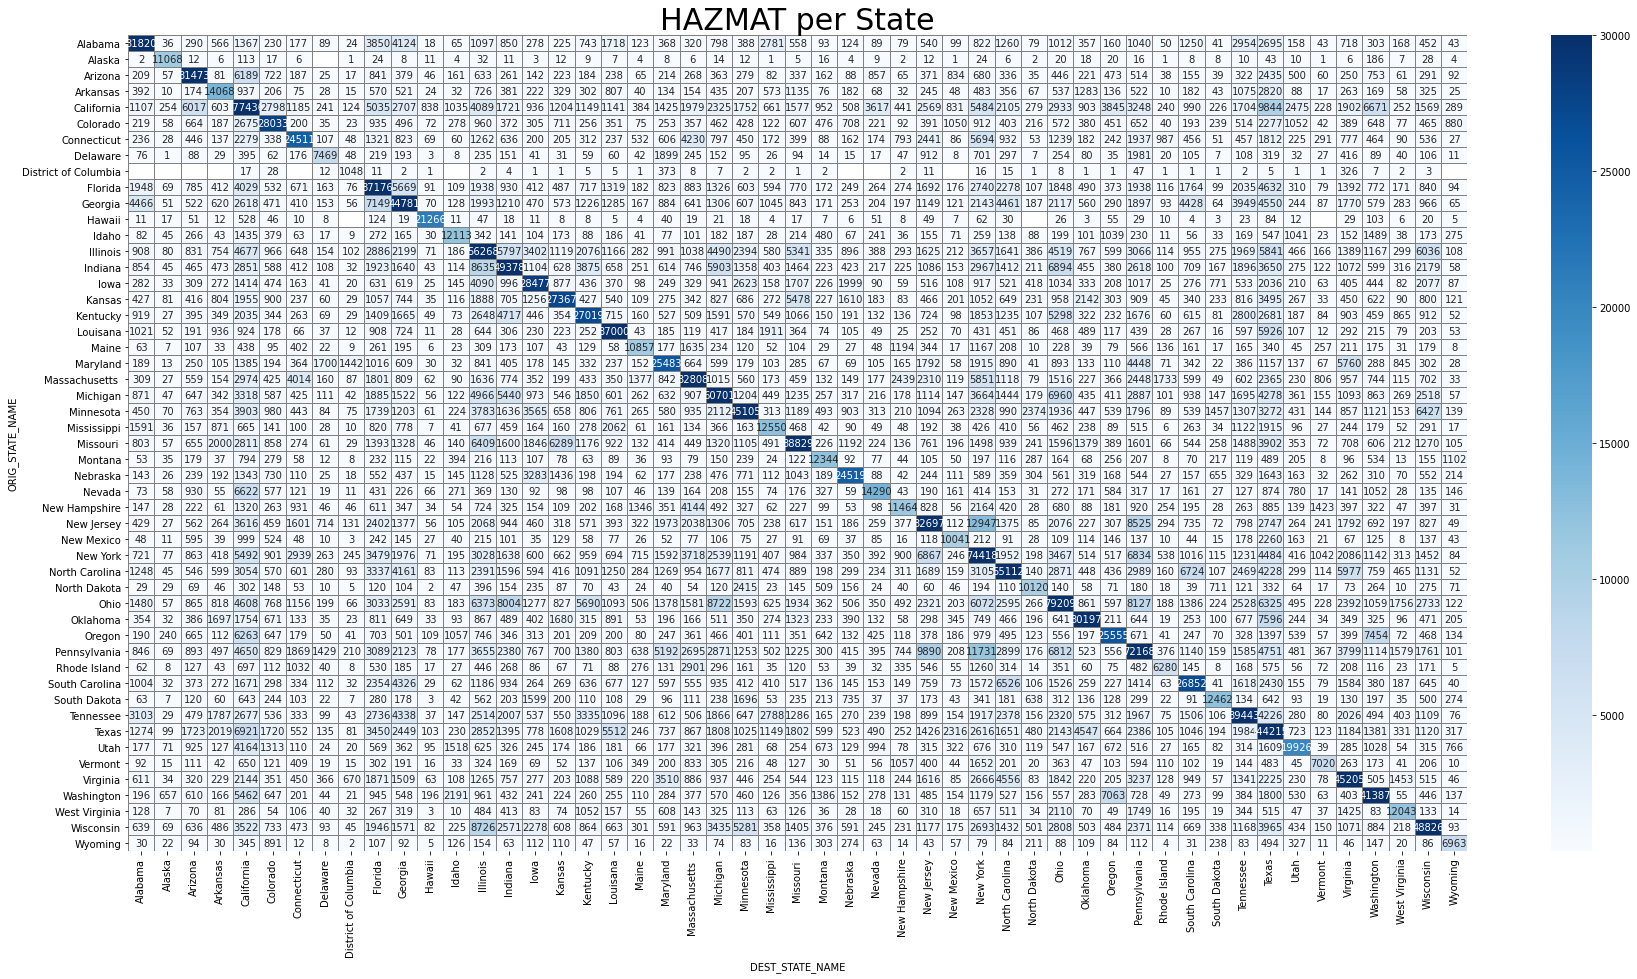

In [14]:
test = df_raw.pivot_table(index='ORIG_STATE_NAME',values='train_idx', aggfunc='count', columns='DEST_STATE_NAME')
plt.figure(figsize=(30, 15))
sns.heatmap(test, annot=True,  cmap='Blues', fmt='g', linecolor='grey',linewidths=1, vmax=30000)
plt.title('HAZMAT per State', size=30)

## Printing Operation for Hazardous Materials H

Text(0.5, 1.0, 'HAZMAT H per State')

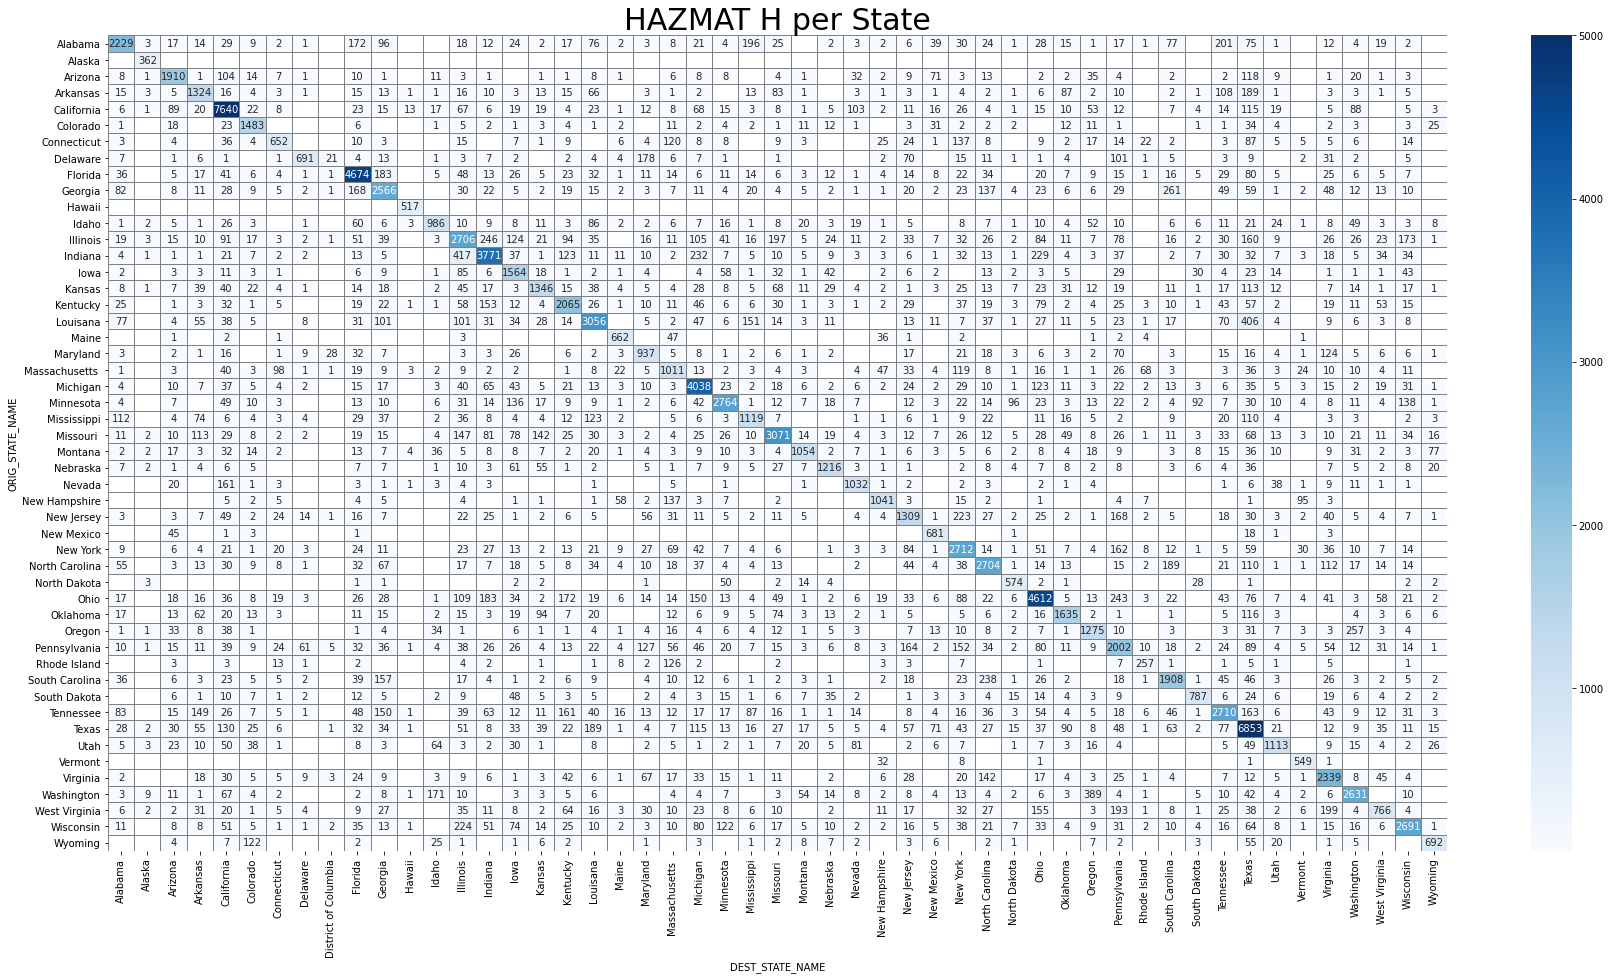

In [25]:

plt.figure(figsize=(30, 15))
sns.heatmap(df_no_haz.pivot_table(index='ORIG_STATE_NAME',values='train_idx', aggfunc='count', columns='DEST_STATE_NAME'), annot=True,  cmap='Blues', fmt='g', linecolor='grey',linewidths=1, vmax=5000)
plt.title('HAZMAT H per State', size=30)

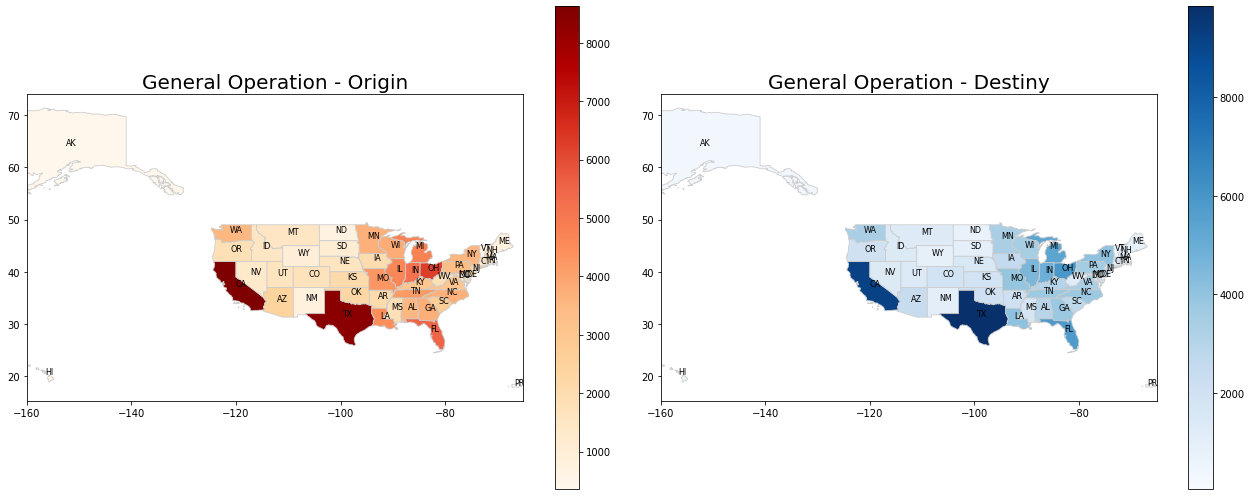

TOP 5 Origins: 


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,code,state,total
11,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.62345 31.91403, -106.63011 31.9...",48,Texas,9834
12,06,01779778,0400000US06,6,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847...",6,California,9211
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",39,Ohio,5942
24,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-81.81169 24.56874, -81.75127 ...",12,Florida,5787
22,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-84.61622 45.89447, -84.51789 ...",26,Michigan,5342


TOP 5 DEST: 


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,code,state,total
12,06,01779778,0400000US06,6,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847...",6,California,8626
11,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.62345 31.91403, -106.63011 31.9...",48,Texas,8394
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",39,Ohio,6277
24,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-81.81169 24.56874, -81.75127 ...",12,Florida,5510
29,18,00448508,0400000US18,18,IN,Indiana,00,92789302676,1538002829,"POLYGON ((-88.05947 37.86669, -88.04086 37.891...",18,Indiana,5212


In [16]:
plotting_map(df_no_haz, shapes,'General Operation')

## Printing Operation for Hazardous Materials N

Text(0.5, 1.0, 'HAZMAT N per State')

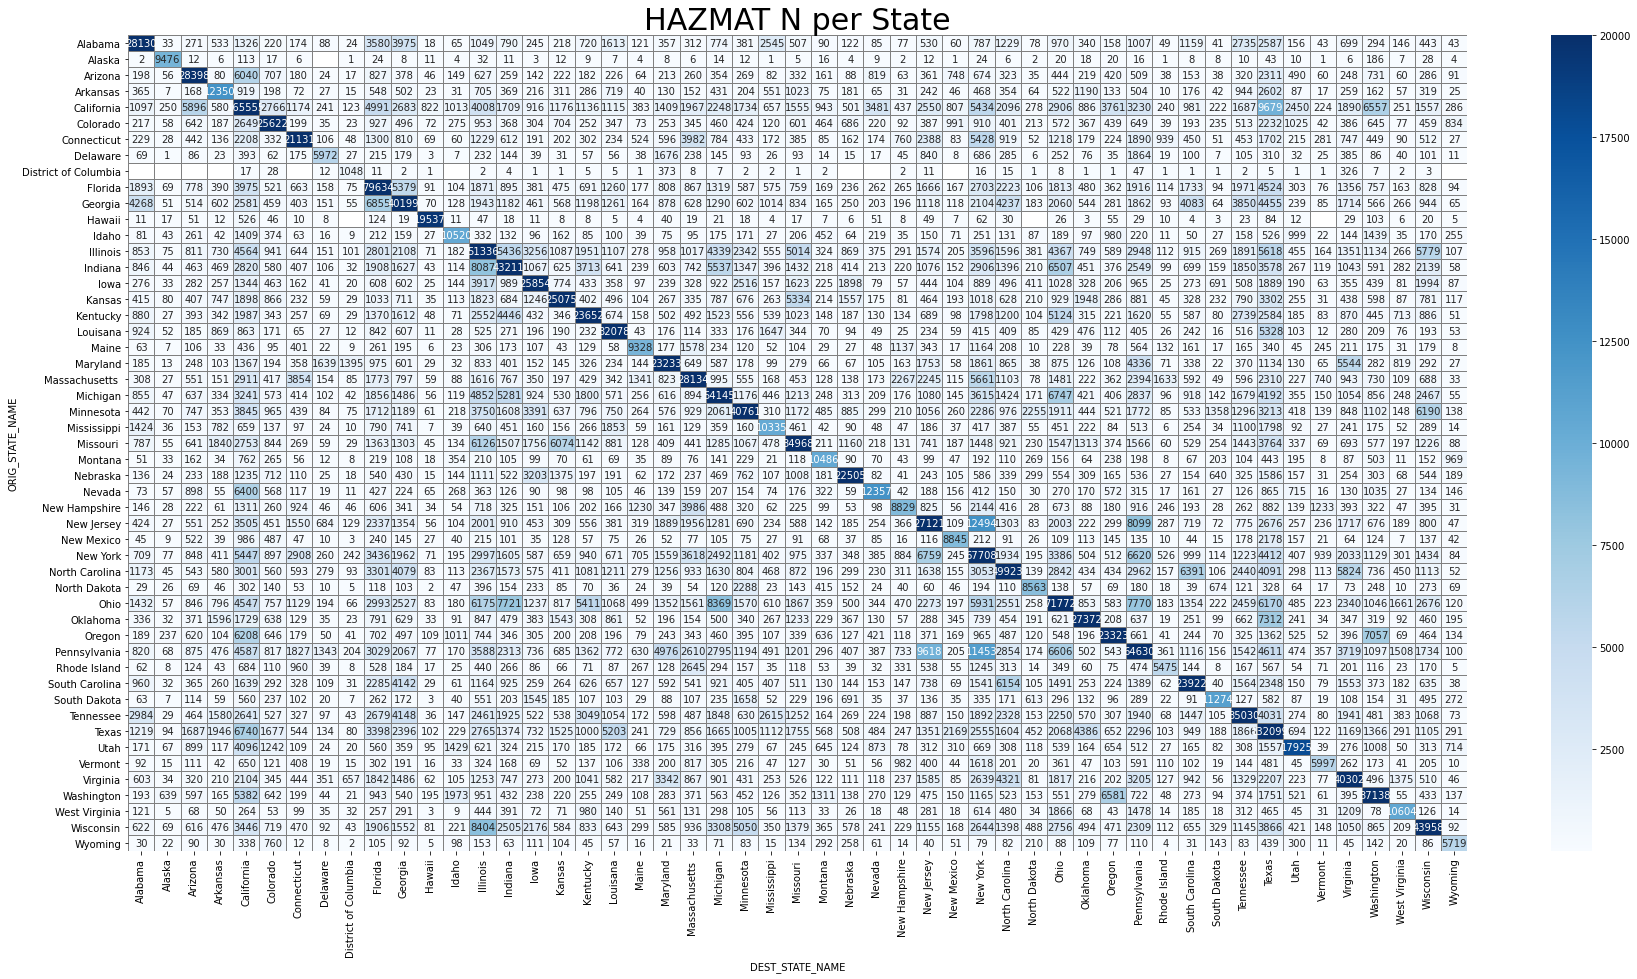

In [22]:

plt.figure(figsize=(30, 15))
sns.heatmap(df_haz_1.pivot_table(index='ORIG_STATE_NAME',values='train_idx', aggfunc='count', columns='DEST_STATE_NAME'), annot=True,  cmap='Blues', fmt='g', linecolor='grey',linewidths=1, vmax=20000)
plt.title('HAZMAT N per State', size=30)

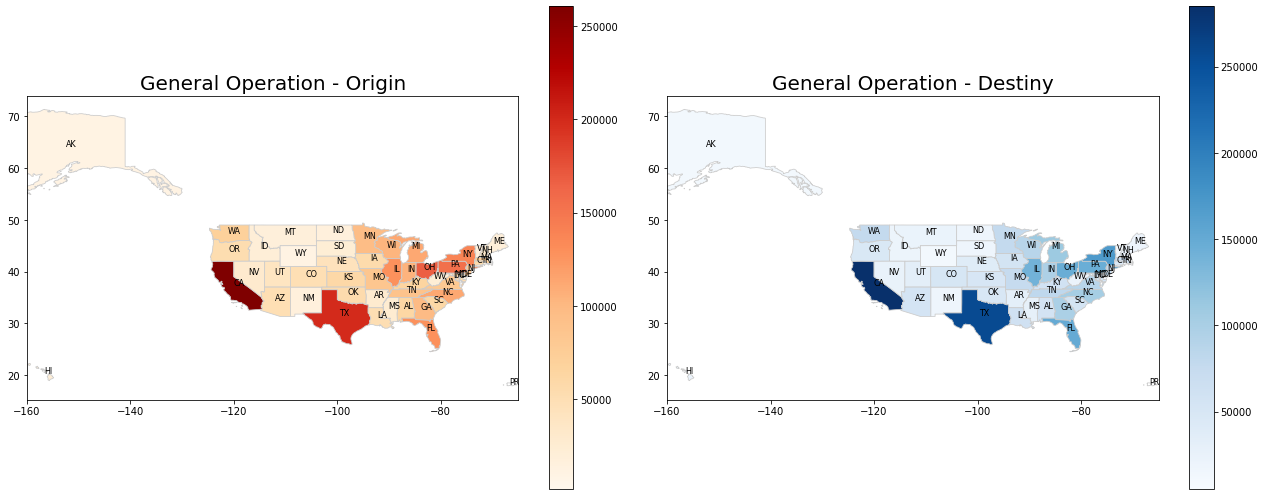

TOP 5 Origins: 


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,code,state,total
12,06,01779778,0400000US06,6,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847...",6,California,284963
11,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.62345 31.91403, -106.63011 31.9...",48,Texas,257419
21,36,01779796,0400000US36,36,NY,New York,00,122049149763,19246994695,"MULTIPOLYGON (((-72.01893 41.27411, -71.92680 ...",36,New York,169700
24,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-81.81169 24.56874, -81.75127 ...",12,Florida,150346
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",39,Ohio,146734


TOP 5 DEST: 


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,code,state,total
12,06,01779778,0400000US06,6,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847...",6,California,260538
11,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.62345 31.91403, -106.63011 31.9...",48,Texas,199791
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",39,Ohio,166664
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987...",42,Pennsylvania,154896
21,36,01779796,0400000US36,36,NY,New York,00,122049149763,19246994695,"MULTIPOLYGON (((-72.01893 41.27411, -71.92680 ...",36,New York,139272


In [17]:
plotting_map(df_haz_1, shapes,'General Operation')

## Printing Operation for Hazardous Materials P

Text(0.5, 1.0, 'HAZMAT P per State')

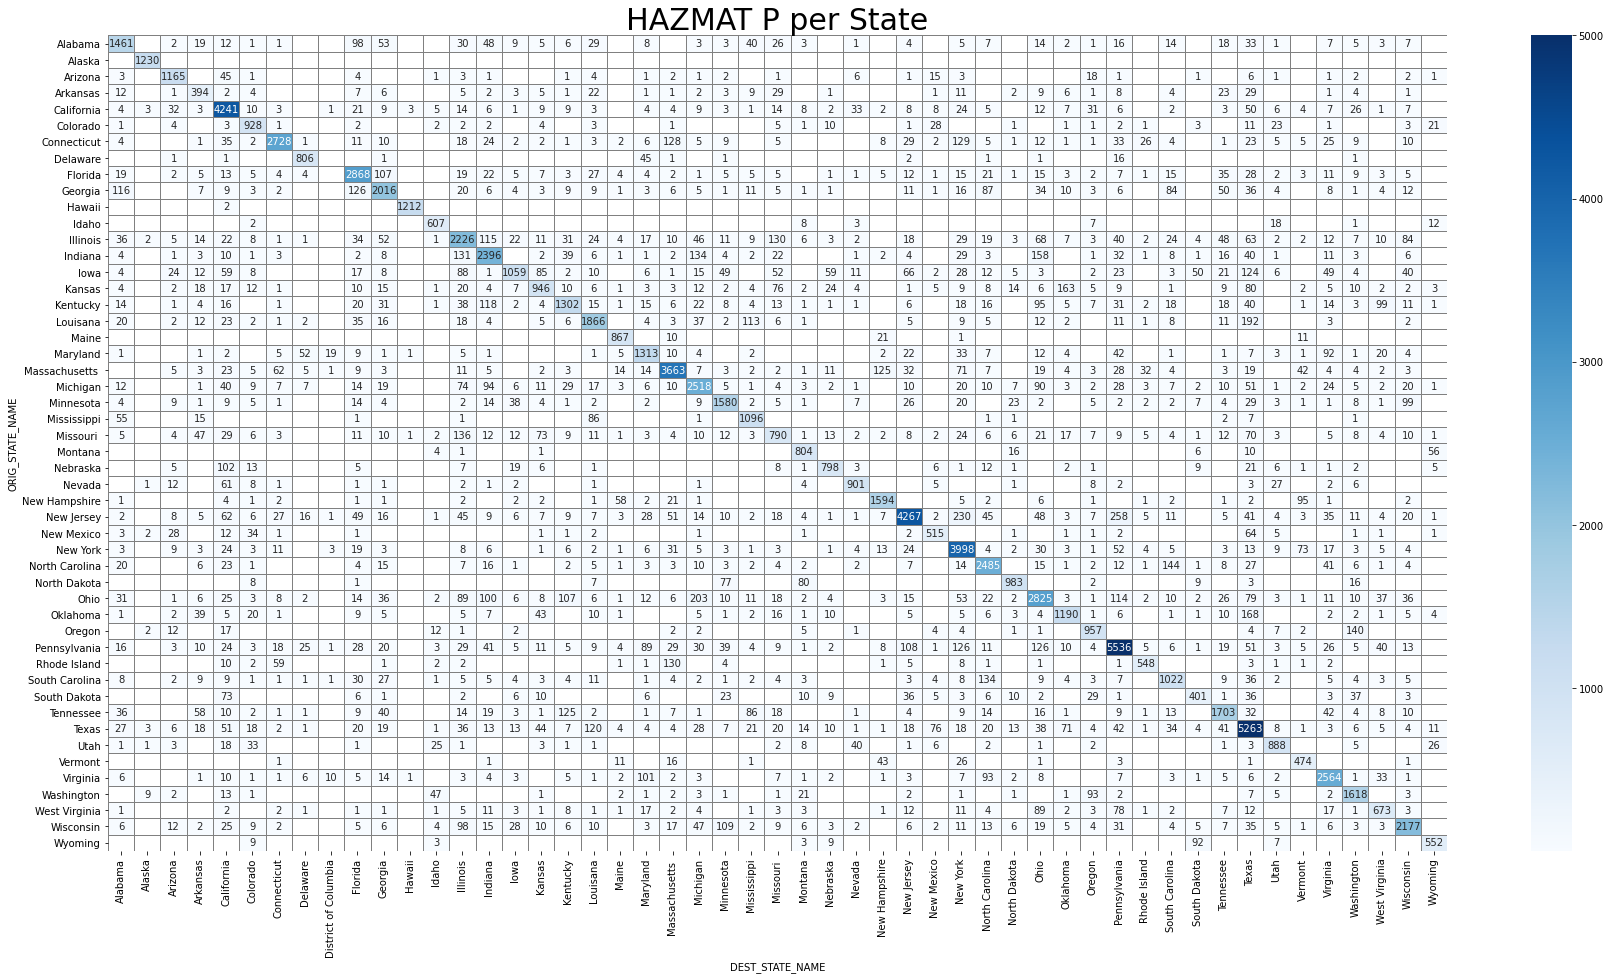

In [24]:

plt.figure(figsize=(30, 15))
sns.heatmap(df_haz_2.pivot_table(index='ORIG_STATE_NAME',values='train_idx', aggfunc='count', columns='DEST_STATE_NAME'), annot=True,  cmap='Blues', fmt='g', linecolor='grey',linewidths=1, vmax=5000)
plt.title('HAZMAT P per State', size=30)

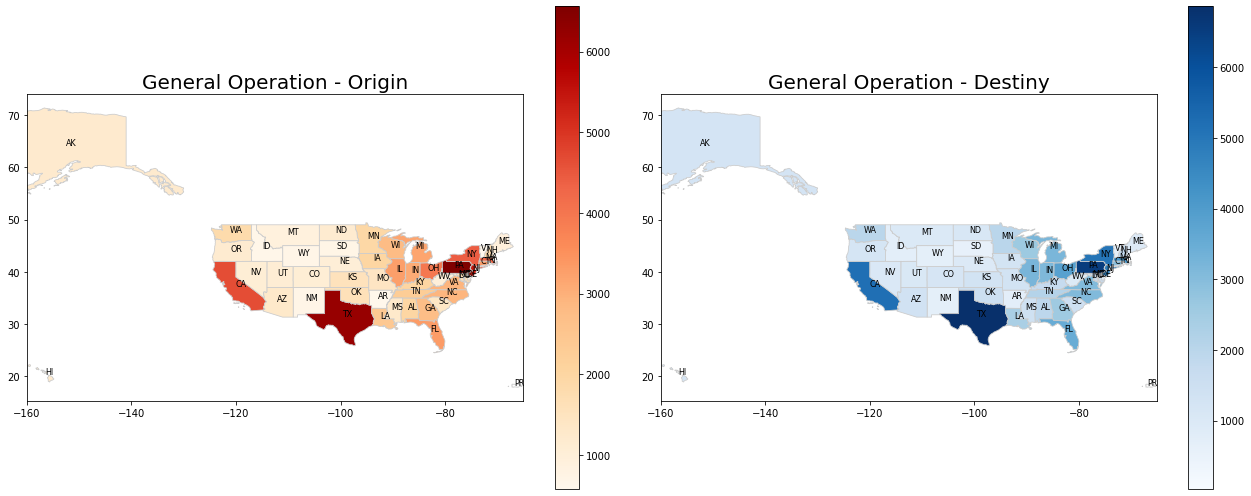

TOP 5 Origins: 


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,code,state,total
11,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.62345 31.91403, -106.63011 31.9...",48,Texas,6858
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987...",42,Pennsylvania,6513
12,06,01779778,0400000US06,6,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847...",6,California,5193
21,36,01779796,0400000US36,36,NY,New York,00,122049149763,19246994695,"MULTIPOLYGON (((-72.01893 41.27411, -71.92680 ...",36,New York,5032
35,34,01779795,0400000US34,34,NJ,New Jersey,00,19047825980,3544860246,"POLYGON ((-75.55945 39.62981, -75.53514 39.647...",34,New Jersey,4784


TOP 5 DEST: 


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,code,state,total
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987...",42,Pennsylvania,6561
11,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.62345 31.91403, -106.63011 31.9...",48,Texas,6194
35,34,01779795,0400000US34,34,NJ,New Jersey,00,19047825980,3544860246,"POLYGON ((-75.55945 39.62981, -75.53514 39.647...",34,New Jersey,5414
12,06,01779778,0400000US06,6,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847...",6,California,4663
21,36,01779796,0400000US36,36,NY,New York,00,122049149763,19246994695,"MULTIPOLYGON (((-72.01893 41.27411, -71.92680 ...",36,New York,4416


In [18]:
plotting_map(df_haz_2, shapes,'General Operation')

## General Observations

## Modelling

For modelling purposes, we will directly use our base raw data as train-test set, since the merge with shapes data was only for visualization purposes

In [70]:
df = pd.read_csv('00 - Data/supply_chain_train.csv')
real = pd.read_csv('00 - Data/supply_chain_test.csv')

In [55]:
df.head(1).transpose()

,0
train_idx,0
SHIPMT_ID,703837
ORIG_STATE,19
ORIG_MA,99999
ORIG_CFS_AREA,19-99999
DEST_STATE,19
DEST_MA,99999
DEST_CFS_AREA,19-99999
NAICS,325
QUARTER,2


In [56]:
df.dtypes

train_idx               int64
SHIPMT_ID               int64
ORIG_STATE              int64
ORIG_MA                 int64
ORIG_CFS_AREA          object
DEST_STATE              int64
DEST_MA                 int64
DEST_CFS_AREA          object
NAICS                   int64
QUARTER                 int64
SCTG                   object
MODE                    int64
SHIPMT_VALUE            int64
SHIPMT_WGHT             int64
SHIPMT_DIST_GC          int64
SHIPMT_DIST_ROUTED      int64
TEMP_CNTL_YN           object
EXPORT_YN              object
EXPORT_CNTRY           object
WGT_FACTOR            float64
HAZMAT                  int64
dtype: object

### TRAIN TEST Split

In [71]:
df['HAZMAT'] = df['HAZMAT'].astype('int64')


In [72]:
def prepare_data_no_categorical(df):
    aux = df.copy().drop(columns=['ORIG_STATE','ORIG_MA','ORIG_CFS_AREA','DEST_STATE','DEST_MA','DEST_CFS_AREA','SCTG'])
    aux['TEMP_CNTL_YN'] = aux['TEMP_CNTL_YN'].apply(lambda x: 0 if x=='N' else 1)
    aux['EXPORT_YN'] = aux['EXPORT_YN'].apply(lambda x: 0 if x=='N' else 1)
    aux['EXPORT_CNTRY'] = aux['EXPORT_CNTRY'].apply(lambda x: 0 if x=='N' else 1)
    return aux

In [73]:
df_nocategorical = prepare_data_no_categorical(df)

In [74]:
df_nocategorical.head(2)

,train_idx,SHIPMT_ID,NAICS,QUARTER,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,WGT_FACTOR,HAZMAT
0,0,703837,325,2,5,1868,67931,119,162,0,0,0,157,1
1,1,2855307,212,1,5,302,32638,17,21,0,0,0,54,1


In [81]:
# train, test split

X = df_nocategorical.drop(columns=['HAZMAT'])
y = df_nocategorical.HAZMAT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [82]:
y_train.value_counts()/y_train.count()*100

1   93
0    4
2    3
Name: HAZMAT, dtype: float64

> 👉 As we saw in the exploratory analysis, the distribution of our target is not balanced, having 93% of the cases at category 1

## Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))